
### Algorithmic Trading Data Analysis
- This code utilizes the pandas library to analyze financial data for algorithmic trading. 
- It includes various functions and methods for data manipulation, exploration, and visualization.


In [6]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
csv_path = "data/BTC-USD.csv"
data = pd.read_csv(csv_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-14,24201.765625,26514.716797,24081.183594,24746.074219,24746.074219,54622230164
1,2023-03-15,24770.925781,25240.615234,23964.910156,24375.960938,24375.960938,43655701450
2,2023-03-16,24373.457031,25190.326172,24225.111328,25052.789063,25052.789063,33866061747
3,2023-03-17,25055.123047,27787.812500,24955.169922,27423.929688,27423.929688,50730261335
4,2023-03-18,27448.117188,27725.953125,26636.261719,26965.878906,26965.878906,35723036817


In [3]:
data[data["Volume"] == 0]
data[data["High"] == data["Low"]]
data_filtered = data[data["High"] != data["Low"]].copy()

In [26]:
dfplot = data_filtered[0:60]
fig = go.Figure(data=[go.Candlestick(
                x=dfplot.index, 
                open=dfplot["Open"], 
                high=dfplot["High"], 
                low=dfplot["Low"], 
                close=dfplot["Close"])])
fig.show()

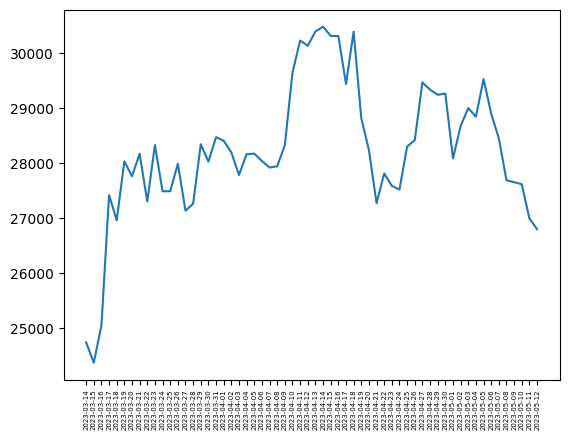

In [29]:
plt.plot(dfplot["Date"], dfplot["Close"])
plt.xticks(rotation=90, fontsize=5)
plt.show()

In [53]:
dfplot = data_filtered[0:60]
MARGIN = 25
fig = go.Figure(data=[go.Candlestick(
                x=dfplot["Date"], 
                open=dfplot["Open"], 
                high=dfplot["High"], 
                low=dfplot["Low"], 
                close=dfplot["Close"],
                increasing_line_color="green", 
                decreasing_line_color="red"),
                go.Scatter(x=dfplot["Date"], y=[27000] * len(dfplot), line=dict(color="blue", width=2), name="Resistance"),
                go.Scatter(x=dfplot["Date"], y=[28500] * len(dfplot), line=dict(color="blue", width=2), name="Resistance"),
                go.Scatter(x=dfplot["Date"], y=dfplot.High+100, mode="markers", marker=dict(color="Purple", size=5), name="Signal"),
                go.Scatter(x=dfplot["Date"], y=dfplot.Low-100, mode="markers", marker=dict(color="Orange", size=5), name="Signal")
                ])
fig.update(layout_xaxis_rangeslider_visible=False) # Hide slider
fig.update_layout(margin_l = MARGIN, margin_r = MARGIN, margin_t = MARGIN, margin_b = MARGIN)
fig.update_yaxes(title_text="Price", showgrid=False)
fig.update_xaxes(title_text="Date", showgrid=False)
fig.show()